In [30]:
#Import Libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

#import previously created classes
from utils.data_analysis_functions import DataAnalyzer


In [2]:
df = pd.read_csv("../data/raw/datos_generacion.csv",sep=";",encoding="latin-1")


In [3]:
df.head(5)

,Fecha,flujoo a condensacion turbo 4,flujo agua alimentacion DZ,flujo agua alimentacion DZ.1,flujo de vapor DZ,flujo vapor sangria DZ,flujo de vapor Uttam,humedad bagazo,porcentaje oxigeno DZ,porcentaje oxigeno Uttam,...,temperatura gases super heater 2 dz,temperatura gases super heater 1 uttam,temperatura gases super heater 2 uttam,temperatura hogar DZ,temperatura hogar uttam,temperatura vapor DZ,temperatura vapor de escape turbo 4,temperatura vapor sangria turbo 4,temperatura de vapor uttam,total energia generada
0,01-mar-23 00:00:00,"3,14429307","65,35387421","107,4485855","64,16832733","20,0021534","109,5539322","49,97142029","8,209988594","2,271173239",...,"587,737793","649,4844971","566,0292358","728,2993774","836,1699829","461,9736023","134,4008636","266,5381775","476,5788879","23,13880348"
1,28-feb-23 23:45:00,"12,51132965","99,47149658","107,9167328","78,79030609","19,76078033","114,3326797","50,11833191","6,193071365","2,048891068",...,"637,9329834","661,5930786","576,9066162","778,3670654","856,6777954","489,3421631","139,3876038","278,29776","479,4463501","28,05930138"
2,28-feb-23 23:30:00,"4,513765812","83,95587158","119,1944504","85,35474396","19,41134453","112,3721313","49,4420929","6,127358437","1,529149175",...,"649,868103","692,9005737","601,0360718","752,1994019","858,1633911","488,0492554","144,5993652","283,2770996","490,8812866","28,40929222"
3,28-feb-23 23:15:00,"7,532711506","100,7267609","108,5950775","86,12540436","19,99505424","112,6150589","50,18331909","3,66428566","0,908086002",...,"670,5360107","690,5091553","596,4403076","848,5499268","863,7695313","486,9465332","142,3869171","282,1745605","497,0881653","28,31794739"
4,28-feb-23 23:00:00,"9,495969772","98,46427917","115,5988693","88,1102829","19,66693878","114,8093719","49,19295502","2,768829823","1,468644261",...,"684,9882813","693,3433838","602,1914063","865,1243896","867,9776001","491,695282","146,2353821","282,1974487","491,4684143","28,53668976"


In [4]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 26209 filas y 38 columnas


In [5]:
df.columns

Index(['Fecha', 'flujoo a condensacion turbo 4', 'flujo agua alimentacion DZ',
       'flujo agua alimentacion DZ.1', 'flujo de vapor DZ',
       'flujo vapor sangria DZ', 'flujo de vapor Uttam', 'humedad bagazo',
       'porcentaje oxigeno DZ', 'porcentaje oxigeno Uttam',
       'presiob a condensador turbo 4', 'presion agua alimentacion uttam',
       'presion agua alimentacion dz', 'presion de vapor DZ',
       'presion vapor de escape turbo 4', 'presion sangria turbo 4',
       'presion de vapor uttam', 'temperatura aire forzado DZ',
       'temperatura aire forzado Uttam',
       'temperatura gases banco principal uttam',
       'temperatura gases chimenea DZ', 'temperatura gases banco principal DZ',
       'temperatura gases entrada economizador uttam',
       'temperatura gases entrada economizador dz',
       'temperatura gases entrada grit catcher uttam',
       'temperatura gases entrada precipitador dz',
       'temperatura gases salida grit catcher dz',
       'temperatura 

In [6]:
df.dtypes


Fecha                                           object
flujoo a condensacion turbo 4                   object
flujo agua alimentacion DZ                      object
flujo agua alimentacion DZ.1                    object
flujo de vapor DZ                               object
flujo vapor sangria DZ                          object
flujo de vapor Uttam                            object
humedad bagazo                                  object
porcentaje oxigeno DZ                           object
porcentaje oxigeno Uttam                        object
presiob a condensador turbo 4                   object
presion agua alimentacion uttam                 object
presion agua alimentacion dz                    object
presion de vapor DZ                             object
presion vapor de escape turbo 4                 object
presion sangria turbo 4                         object
presion de vapor uttam                          object
temperatura aire forzado DZ                     object
temperatur

In [7]:
# Reemplazamos las comas por puntos y convertimos a float
for col in df.columns:
    if col != 'Fecha':  # Excluimos la columna Fecha
        df[col] = pd.to_numeric(
            df[col].str.replace(',', '.', regex=False).str.strip(),
            errors='coerce'
        )
df.dtypes

Fecha                                            object
flujoo a condensacion turbo 4                   float64
flujo agua alimentacion DZ                      float64
flujo agua alimentacion DZ.1                    float64
flujo de vapor DZ                               float64
flujo vapor sangria DZ                          float64
flujo de vapor Uttam                            float64
humedad bagazo                                  float64
porcentaje oxigeno DZ                           float64
porcentaje oxigeno Uttam                        float64
presiob a condensador turbo 4                   float64
presion agua alimentacion uttam                 float64
presion agua alimentacion dz                    float64
presion de vapor DZ                             float64
presion vapor de escape turbo 4                 float64
presion sangria turbo 4                         float64
presion de vapor uttam                          float64
temperatura aire forzado DZ                     

In [8]:
analyzer_statistic = DataAnalyzer(df.iloc[:,1:])
statistics_numeric = analyzer_statistic.analyze_and_combine(df.columns[1:])
statistics_numeric

,Column Name,Data Type,Unique Values,Repeated Values,Missing Values,Number of Duplicates,count,mean,std,min,25%,50%,75%,max,Mode,Variance,Skewness,Kurtosis
0,flujo agua alimentacion DZ,float64,25880,329,2,328,26207.0,75.980406,35.041883,0.000000,59.399803,87.739136,101.319546,133.284088,0.00,1227.93,-0.93,-0.28
1,flujo agua alimentacion DZ.1,float64,25762,447,14,446,26195.0,91.808787,42.001440,-0.463782,89.929989,103.818665,115.150963,225.727402,-0.11,1764.12,-1.29,0.68
2,flujo de vapor DZ,float64,25647,562,2,561,26207.0,58.517926,35.139602,0.000000,33.928913,68.330338,87.456814,116.371269,0.00,1234.79,-0.57,-1.03
3,flujo de vapor Uttam,float64,26151,58,14,57,26195.0,86.569182,37.915562,-0.096072,88.028862,101.188522,108.792068,141.904205,0.07,1437.59,-1.60,1.05
4,flujo vapor sangria DZ,float64,24203,2006,3,2005,26206.0,10.101142,7.352843,0.004907,5.705408,8.878704,18.466928,20.727911,20.73,54.06,0.10,-1.29
5,flujoo a condensacion turbo 4,float64,26010,199,3,198,26206.0,7.420127,11.822492,-35.285660,0.890025,2.668163,11.128573,155.141846,-0.04,139.77,4.37,35.84
6,humedad bagazo,float64,26141,68,2,67,26207.0,37.264566,19.016573,-3.312435,39.818392,46.415241,49.054008,73.892433,41.67,361.63,-1.26,-0.24
7,porcentaje oxigeno DZ,float64,25741,468,2,467,26207.0,7.830475,6.401420,-5.246902,3.432388,5.478976,9.268999,21.727726,21.72,40.98,1.10,-0.12
8,porcentaje oxigeno Uttam,float64,25099,1110,14,1109,26195.0,3.279824,3.397090,-2.510703,0.557706,2.107655,4.573536,10.324860,10.29,11.54,1.08,-0.12
9,presiob a condensador turbo 4,float64,26028,181,4,180,26205.0,0.334816,0.254435,0.179451,0.208698,0.220699,0.243849,0.997264,0.88,0.06,1.76,1.17


In [13]:
# Reemplazamos los valores nulos por la media
numeric_cols = df.select_dtypes('float64').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [15]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()

# Filter out columns with at least one missing value
columns_with_missing = missing_values[missing_values > 0]

if columns_with_missing.empty:
    print("No missing values, data imputation was done correctly")
else:
    print("Missing values found in the following columns:")
    for column, count in columns_with_missing.items():
        print(f"- {column}: {count} missing value(s)")

No missing values, data imputation was done correctly


In [24]:
# Diccionario de abreviaturas de meses en español a inglés
months_mapping = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr',
    'may': 'May', 'jun': 'Jun', 'jul': 'Jul', 'ago': 'Aug',
    'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec'
}

# Reemplazo de meses en la columna
df['Fecha'] = df['Fecha'].replace(months_mapping, regex=True)

# Conversión a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%b-%y %H:%M:%S')

# Check if the conversion was successful and display an appropriate message
if pd.api.types.is_datetime64_any_dtype(df['Fecha']):
    print("The 'Fecha' column was successfully converted to datetime type.")
    print("Data type:", df['Fecha'].dtype)
else:
    print("There was an issue converting the 'Fecha' column.")
    print("The current data type is:", df['Fecha'].dtype)



The 'Fecha' column was successfully converted to datetime type.
Data type: datetime64[ns]


In [25]:
# Check the number of missing values in the 'Fecha' column and print a brief message
print(f"There are {df['Fecha'].isnull().sum()} missing values in the 'Fecha' column.")


There are 0 missing values in the 'Fecha' column.


In [26]:
#Check if all values in the 'Fecha' column are unique
if df['Fecha'].is_unique:
    print("All values in the 'Fecha' column are unique.")
else:
    print("There are duplicate values in the 'Fecha' column.")

All values in the 'Fecha' column are unique.


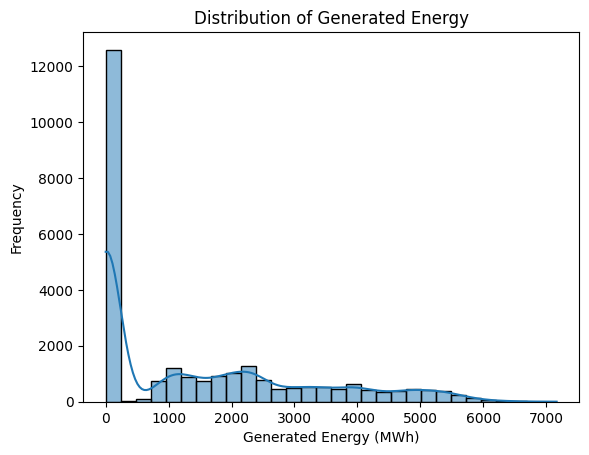

In [17]:
# distribution of the data in the 'total energia generada' column
sns.histplot(df['total energia generada'], bins=30, kde=True)
plt.title('Distribution of Generated Energy')
plt.xlabel('Generated Energy (MWh)')
plt.ylabel('Frequency')
plt.show()


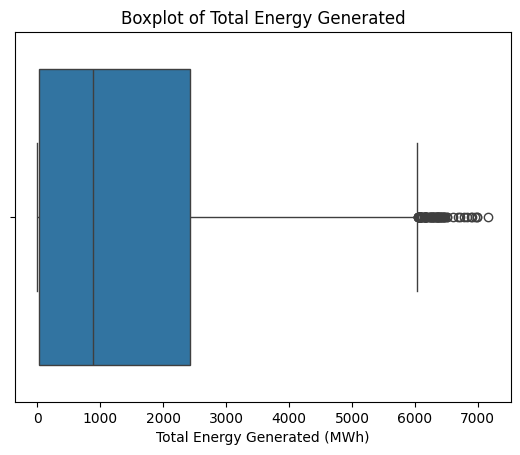

In [18]:
# Boxplot of the 'total energia generada' column
sns.boxplot(x=df['total energia generada'])
plt.title('Boxplot of Total Energy Generated')
plt.xlabel('Total Energy Generated (MWh)')
plt.show()


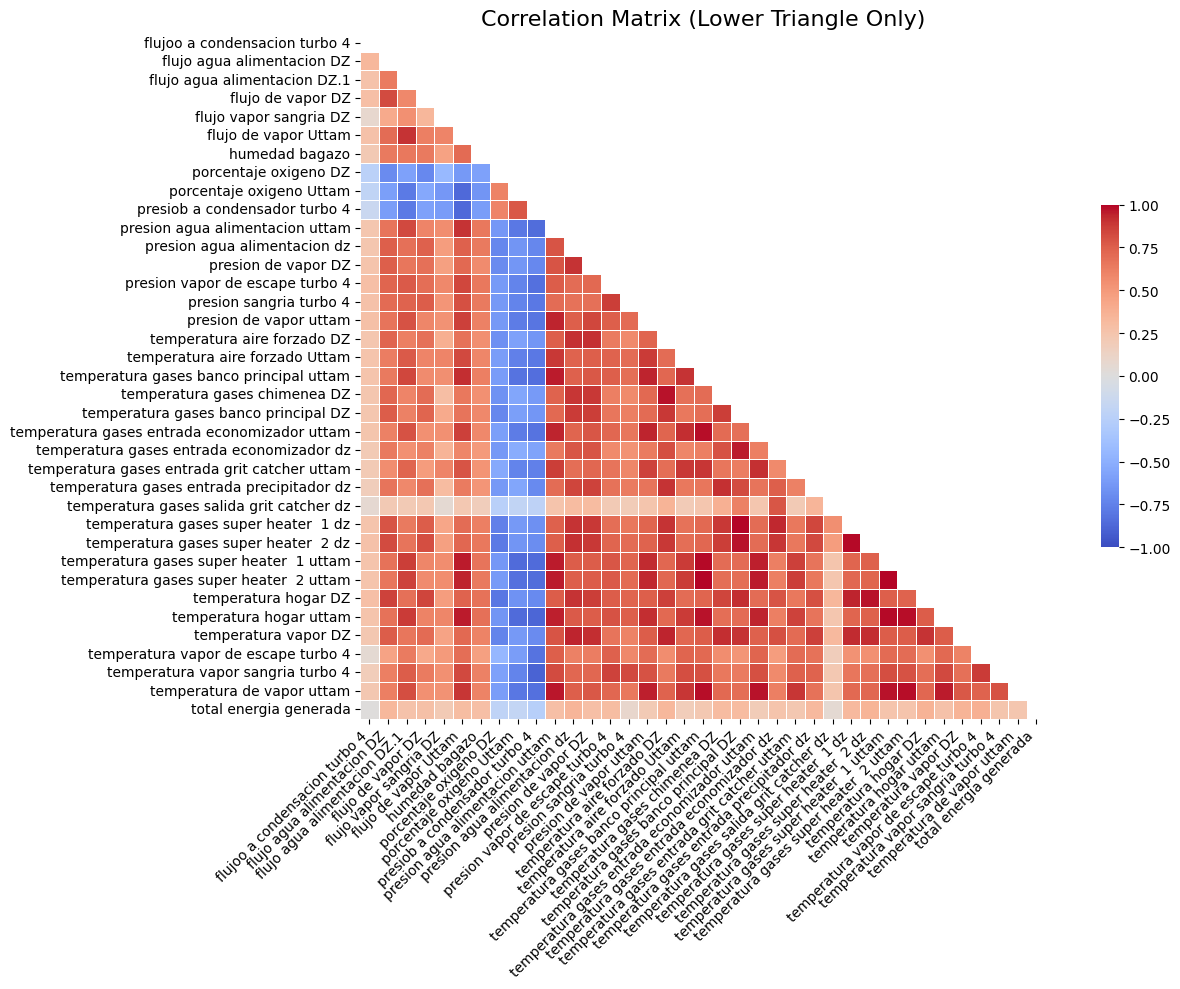

In [35]:
# Calculate the correlation matrix excluding the first column
correlation_matrix = df.iloc[:, 1:].corr()

# Create a mask to hide the upper triangle, including the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)

plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    mask=mask,             # Hide upper triangle and the diagonal
    cmap='coolwarm',
    annot=False,           # Do not display numeric annotations
    vmin=-1, vmax=1,       # Set color scale limits
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()